In [145]:
import gempy as gp
#importing additional libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [146]:
#setting options
np.random.seed(1515)
pd.set_option('precision',2)

geo_model = gp.create_model('Simple_Straelen_model')


data_path ='C:/RWTH_Aachen/thesis/GemPy_Model_from_Andrea/refined/'

In [147]:
#importing the data from csv files and setting extent and resolution

#put dimentions of your model and x y z limits
gp.init_data(geo_model, [200000, 220000., 370000, 394200., 0, 2500.], [100, 100, 50],
           
             path_o=data_path + "all_model_orientations_rev.csv",
             path_i=data_path + "handpicked_all_model_points_rev.csv",
             default_values=True)

Active grids: ['regular']


Simple_Straelen_model  2023-03-16 13:52

In [148]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Viersen_Fault,Default series,1,#015482,1
1,Base_Tertiary,Default series,2,#9f0052,2
2,Top_Dinantian,Default series,3,#ffbe00,3
3,Base_Dinantian,Default series,4,#728f02,4
4,Top_Devonian,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [149]:
#setting the order of the formations and locations - geol sequence
gp.get_data(geo_model, 'surface_points').head()




,X,Y,Z,smooth,surface
0,212886.47,386293.25,1438.84,2.00e-06,Viersen_Fault
1,214018.93,381038.23,1292.09,2.00e-06,Viersen_Fault
2,214036.47,378345.80,878.66,2.00e-06,Viersen_Fault
3,212497.13,388727.50,1778.52,2.00e-06,Viersen_Fault
4,214900.68,375129.38,935.02,2.00e-06,Viersen_Fault


In [150]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,213147.2,386374.1,1681.25,-9.06e-01,1.00e-12,0.42,0.01,Viersen_Fault
1,203610.0,379150.0,1879.86,1.00e-12,1.00e-12,1.00,0.01,Base_Tertiary
2,203010.0,373670.0,1200.10,1.00e-12,1.00e-12,1.00,0.01,Top_Dinantian
3,204000.0,394000.0,908.20,1.00e-12,1.00e-12,1.00,0.01,Base_Dinantian
4,200710.0,382530.0,439.80,1.00e-12,1.00e-12,1.00,0.01,Top_Devonian


In [167]:
#Assigning densities to the layers 
geo_model.surfaces.add_surfaces_values([[1, 2.2, 2.3, 2.7, 2.5], ['value_0']])

AttributeError: add_surfaces_values

In [152]:
gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Viersen_Fault',
                          "Strat_Series": ('Base_Tertiary', 'Top_Dinantian',
                                           'Base_Dinantian', 'Top_Devonian',)},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
0,Viersen_Fault,Fault_Series,1,#015482,1
1,Base_Tertiary,Strat_Series,1,#9f0052,2
2,Top_Dinantian,Strat_Series,2,#ffbe00,3
3,Base_Dinantian,Strat_Series,3,#728f02,4
4,Top_Devonian,Strat_Series,4,#443988,5
5,basement,Basement,1,#ff3f20,6


In [153]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Erosion,True,False,False
Strat_Series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [154]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [155]:
geo_model.faults.faults_relations_df

,Fault_Series,Strat_Series,Basement
Fault_Series,False,True,True
Strat_Series,False,False,False
Basement,False,False,False


In [156]:
#now geomodel contains important info, returning info from the input data
geo_model.grid

gp.get_data(geo_model, 'surface_points').head()



,X,Y,Z,smooth,surface
0,212886.47,386293.25,1438.84,2.00e-06,Viersen_Fault
1,214018.93,381038.23,1292.09,2.00e-06,Viersen_Fault
2,214036.47,378345.80,878.66,2.00e-06,Viersen_Fault
3,212497.13,388727.50,1778.52,2.00e-06,Viersen_Fault
4,214900.68,375129.38,935.02,2.00e-06,Viersen_Fault


In [157]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,213147.2,386374.1,1681.25,-9.06e-01,1.00e-12,0.42,0.01,Viersen_Fault
1,203610.0,379150.0,1879.86,1.00e-12,1.00e-12,1.00,0.01,Base_Tertiary
2,203010.0,373670.0,1200.10,1.00e-12,1.00e-12,1.00,0.01,Top_Dinantian
3,204000.0,394000.0,908.20,1.00e-12,1.00e-12,1.00,0.01,Base_Dinantian
4,200710.0,382530.0,439.80,1.00e-12,1.00e-12,1.00,0.01,Top_Devonian


C:\Users\tgluz\.conda\envs\model_gem\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


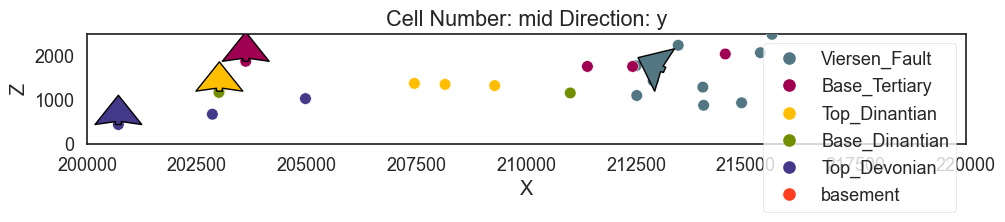

In [158]:
#visualising input data
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False, )
plt.show()



In [159]:
gpv = gp.plot_3d(geo_model, image=False,  plotter_type='basic', )

In [160]:
#Model generation
gp.set_interpolator(geo_model,
                    comlile_theano=True,
                    theano_optimizer='fast_compile',)

gp.get_data(geo_model, 'kriging')

sol = gp.compute_model(geo_model)

sol

geo_model.solutions

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                       values
range               31494.29
$C_o$            23616428.57
drift equations    [3, 3, 3]



Lithology ids 
  [6. 6. 6. ... 2. 2. 2.] 

In [161]:
#Direct visualisation in GemPy
#lithology block
#gp.plot_2d(geo_model, cell_number=25,show_data=True)
#plt.show()
#lithological scalar-field solution -> fold related deformation
#gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
#plt.show()

#fold related deformation on stratigraphy
#gp.plot_2d(geo_model, series_n=1, show_data=False, show_scalar=True, show_lith=False)
#plt.show()

#fault network modelling
#geo_model.solutions.scalar_field_at_surface_points

##gp.plot_2d(geo_model, show_block=True, show_lith=False)
#plt.show()

#gp.plot_2d(geo_model, series_n=1, show_block=True, show_lith=False)
#plt.show()

In [162]:
#3D visualisation with cubes
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [163]:
#Adding topography NEED TO IMPLEMENT DTM
#geo_model.set_topography(d_z=(350,750))

#gp.compute_model(geo_model)
#gp.plot_2d(geo_model, show_topography=True)
#plt.show()


In [164]:
# sphinx_gallery_thumbnail_number = 9
#gpv = gp.plot_3d(geo_model, plotter_type='basic', show_topography=True, show_surfaces=True,
#                 show_lith=True,
#                 image=False)

In [165]:
#returning the id at the scalar field values
x_i = np.array([3, 5, 6])
sol = gp.compute_model(geo_model, at=x_i)

sol.custom

Active grids: ['custom']


C:\Users\tgluz\.conda\envs\model_gem\lib\site-packages\gempy\core\solution.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.custom = np.array(


array([array([[6.]]), array([[8.13808645],
                             [0.22683722]])], dtype=object)

In [166]:
#save the model!

gp.save_model(geo_model)

True